In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

US = pd.read_csv("Input/US_Topics.csv")
AUS = pd.read_csv("Input/AUS_Topics.csv")
JAP = pd.read_csv("Input/JAP_Topics.csv")
ENG = pd.read_csv("Input/ENG_Topics.csv")

All_Terms_df = pd.DataFrame(US)
All_Terms_df["Country"] = "United States"
AUS_Terms_df = pd.DataFrame(AUS)
AUS_Terms_df["Country"] = "Australia"
JAP_Terms_df = pd.DataFrame(JAP)
JAP_Terms_df["Country"] = "Japan"
ENG_Terms_df = pd.DataFrame(ENG)
ENG_Terms_df["Country"] = "England"

All_Terms_df = All_Terms_df.append(AUS_Terms_df, ignore_index=True)
All_Terms_df = All_Terms_df.append(JAP_Terms_df, ignore_index=True)
All_Terms_df = All_Terms_df.append(ENG_Terms_df, ignore_index=True)

All_Terms_df.head()


,Month,Topic,Rank,Country
0,May,Google,100,United States
1,May,Google Search,97,United States
2,May,Game,52,United States
3,May,Coronavirus,47,United States
4,May,Google Doodle,41,United States


Update the topics to all be coronavirus to see the Top Topics better after running the plots

In [2]:
All_Terms_df["Topic"] = All_Terms_df["Topic"].replace(['Coronavirus disease 2019','Severe acute respiratory syndrome coronavirus 2'],'Coronavirus')
All_Terms_df.head()

,Month,Topic,Rank,Country
0,May,Google,100,United States
1,May,Google Search,97,United States
2,May,Game,52,United States
3,May,Coronavirus,47,United States
4,May,Google Doodle,41,United States


See all the data in order of rank, regardless of month or country

In [3]:
All_Terms_df.sort_values("Rank", ascending=False)

,Month,Topic,Rank,Country
0,May,Google,100,United States
150,Jun,Protest,100,United States
275,Nov,2020,100,United States
824,Jul,Weather,100,Japan
1074,Jun,United Kingdom,100,England
...,...,...,...,...
74,Jan,Texas,16,United States
896,Sep,Film,16,Japan
897,Sep,Woman,16,Japan
898,Sep,Shop,16,Japan


Get all of the rows with 90 or more Rank to see what kind of data it was

In [4]:
Rank_100 = All_Terms_df[All_Terms_df["Rank"] >= 90]
Rank_100

,Month,Topic,Rank,Country
0,May,Google,100,United States
1,May,Google Search,97,United States
25,Dec,Google,100,United States
26,Dec,Weather,100,United States
27,Dec,Google Search,100,United States
...,...,...,...,...
1074,Jun,United Kingdom,100,England
1099,Mar,United Kingdom,100,England
1124,May,United Kingdom,100,England
1149,Nov,United Kingdom,100,England


The next 4 steps are the graphs to show the above table for each country.

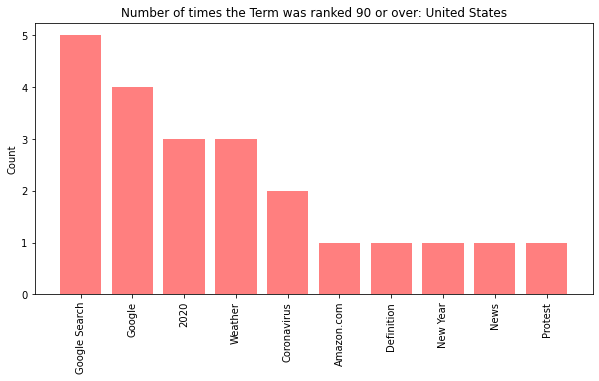

In [5]:
US_Terms_df = All_Terms_df[All_Terms_df["Country"] == 'United States'] 
US_Terms_df_Top = US_Terms_df[US_Terms_df["Rank"]>=90]
US_Terms_df_Top_grouped = US_Terms_df_Top.groupby(["Topic"]).count().sort_values("Rank", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(US_Terms_df_Top_grouped.index, US_Terms_df_Top_grouped["Rank"], color='r', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel("Count")
plt.title("Number of times the Term was ranked 90 or over: United States")
plt.show()

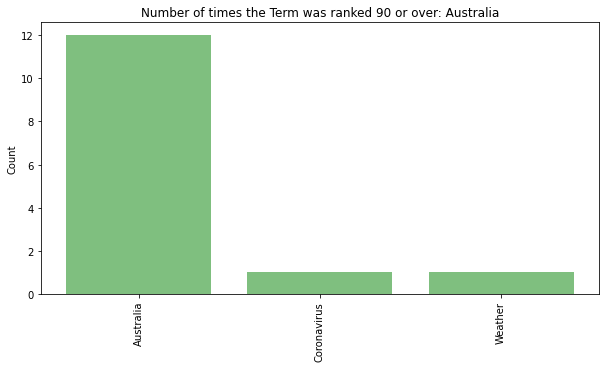

In [6]:
AUS_Terms_df = All_Terms_df[All_Terms_df["Country"] == 'Australia'] 
AUS_Terms_df_Top = AUS_Terms_df[AUS_Terms_df["Rank"]>=90]
AUS_Terms_df_Top_grouped = AUS_Terms_df_Top.groupby(["Topic"]).count().sort_values("Rank", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(AUS_Terms_df_Top_grouped.index, AUS_Terms_df_Top_grouped["Rank"], color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel("Count")
plt.title("Number of times the Term was ranked 90 or over: Australia")
plt.show()

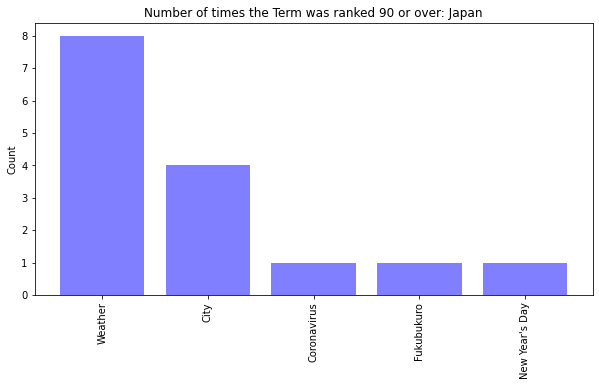

In [7]:
JAP_Terms_df = All_Terms_df[All_Terms_df["Country"] == 'Japan'] 
JAP_Terms_df_Top = JAP_Terms_df[JAP_Terms_df["Rank"]>=90]
JAP_Terms_df_Top_grouped = JAP_Terms_df_Top.groupby(["Topic"]).count().sort_values("Rank", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(JAP_Terms_df_Top_grouped.index, JAP_Terms_df_Top_grouped["Rank"], color='b', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel("Count")
plt.title("Number of times the Term was ranked 90 or over: Japan")
plt.show()

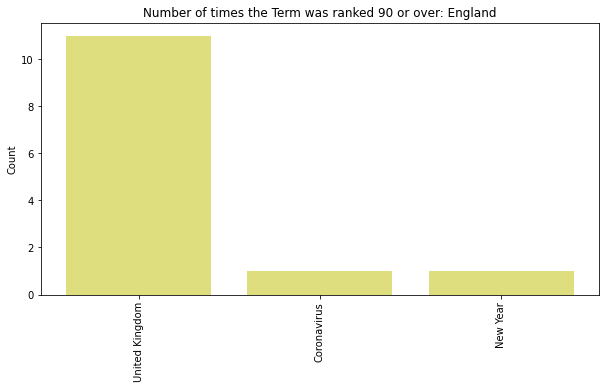

In [8]:
ENG_Terms_df = All_Terms_df[All_Terms_df["Country"] == 'England'] 
ENG_Terms_df_Top = ENG_Terms_df[ENG_Terms_df["Rank"]>=90]
ENG_Terms_df_Top_grouped = ENG_Terms_df_Top.groupby(["Topic"]).count().sort_values("Rank", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(ENG_Terms_df_Top_grouped.index, ENG_Terms_df_Top_grouped["Rank"], color='y', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel("Count")
plt.title("Number of times the Term was ranked 90 or over: England")
plt.show()